<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_301_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TecQuipment - Vibration Analyser

# Week 01

## Activity 01

In [ ]:
import sympy as sp
import numpy as np


In [ ]:
m, mm, L, k = sp.symbols('m mm L k', positive=True)
#Beam length = L
#Mass of beam = m
#Mass of motor = mm
#Spring stiffness = k

In [ ]:
#Define mass and stiffness matrices
M = sp.Matrix([
    [m + mm, 0],
    [0, (1/3)*m*L**2]
])

K = sp.Matrix([
    [k, k*L/2],
    [k*L/2, k*L**2/4]
])

M, K


(Matrix([
 [m + mm,                        0],
 [     0, 0.333333333333333*L**2*m]]),
 Matrix([
 [    k,    L*k/2],
 [L*k/2, L**2*k/4]]))

In [ ]:
#Solve for natural frequencies
omega2 = sp.symbols('omega2')
char_eq = sp.det(K - omega2*M)
sp.solve(char_eq, omega2)


[0.0, 0.25*k*(7.0*m + 3.0*mm)/(m*(m + mm))]

Choosing the equilibrium positions of the masses as the reference points and applying Newton's laws we obtain
\begin{align}
m_1\ddot{x}_1+(c_1+c_2)\dot{x}_1+(k_1+k_2)x_1 -c_2\dot{x}_2-k_2x_2 &=&f(t),\\
m_2\ddot{x}_2+c_2\dot{x}_2+k_2x_2-c_2\dot{x}_1-k_2x_1 &=&0,
\end{align}
where we have set $f(t)=p_0\cos{(\omega t)}$.
We can write the above equations as
\begin{align}
\begin{bmatrix} m_1 & 0\\0 & m_2\end{bmatrix}\begin{bmatrix} \ddot{x}_1 \\ \ddot{x}_2\end{bmatrix}+
\begin{bmatrix} (c_1+c_2) & -c_2\\-c_2 & c_2\end{bmatrix} \begin{bmatrix}\dot{x}_1 \\ \dot{x}_2\end{bmatrix}+
\begin{bmatrix} (k_1+k_2) & -k_2\\-k_2 & k_2\end{bmatrix}\begin{bmatrix} {x}_1 \\ {x}_2\end{bmatrix} =
\begin{bmatrix} f(t) \\ 0\end{bmatrix}
\end{align}

Let
\begin{align}
X(t)=\begin{bmatrix}x_1(t)\\ x_2(t)\end{bmatrix},\:\:\:\:f(t)=\begin{bmatrix}f_1(t)\\ 0\end{bmatrix},\:\:\:\:
M=\begin{bmatrix} m_1 & 0\\0 & m_2\end{bmatrix} ,\:\:\:\: C=\begin{bmatrix} (c_1+c_2) & -c_2\\-c_2 & c_2\end{bmatrix} \:\:\:\:
K=\begin{bmatrix} (k_1+k_2) & -k_2\\-k_2 & k_2\end{bmatrix}.
\end{align}
Then we can write the above equations as
\begin{align}
M\ddot{X}+C\dot{X}+KX=F(t).
\end{align}

Notice the similarity with the 1-DOF spring mass damper system. We are interested in solving this $2^{nd}$ order matrix ODE in order to understand the vibratory behavior of the system. We do so in two steps. Recalling the crucial role the undamped natural frequency played in the resonance analysis of the 1-DOF spring mass damper system we first investigate undamped free vibrations of the system and then consider the damped forced vibration behavior of the system.


For completeness we also write down the dynamic system form of the model.
\begin{align}
\dot{X}= AX+B\,f(t),
\end{align}
where
\begin{align}
X(t)=\begin{bmatrix} x_1(t)\\ x_2(t) \\ \dot{x}_1(t)\\ \dot{x}_2 (t)\end{bmatrix},\:\:\:\:
B=\begin{bmatrix}0\\ 0\\ 1\\ 0\end{bmatrix},\:\:\:\:
A=\begin{bmatrix} 0 & 0 & 1& 0\\ 0 & 0 & 0 &1 \\ -(k_1+k_2) & k_2&-(c_1+c_2) & c_2\\ k_2 & -k_2 & c_2 & -c_2
\end{bmatrix}
\end{align}

In vibration analysis we are typically interested in near resonant conditions. That is, in cases where the system is very lightly damped and the forcing frequency is close to the resonance frequencies of the system. Since the behavior of the system depends smoothly on the damping ratios we see that the real behavior of the system will thus be described in a qualitative and approximately quantitative sense quite well by analyzing the case where the damping is zero.

Thus in this section we will assume that the damping is negligible and hence that the system equations are approximately given by
\begin{align}
\ddot{X}+\Omega X=M^{-1}F(t),
\end{align}
where
\begin{align}
\Omega=M^{-1}K=
\begin{bmatrix}\omega_{n1}^2(1+\alpha \mu)& -\alpha\mu \omega_{n_1}^2\\ -\alpha\omega_{n1}^2 & \alpha\omega_{n1}^2\end{bmatrix}.
\end{align}
with
\begin{align}
\omega_{n1}^2=\frac{k_1}{m_1},\:\:\:\omega_{n2}^2=\frac{k_2}{m_2},\:\:\:2\zeta_1\omega_{n1}=\frac{c_1}{m_1},\:\:\:2\zeta_2\omega_{n2}=\frac{c_2}{m_2},
\:\:\:\mu=\frac{m_2}{m_1},\:\:\:\alpha=\frac{\omega_{n_2}^2}{\omega_{n_1}^2}
\end{align}

Let $\omega_1^2,\omega_2^2$ be the eignevalues of $\Omega$ and
\begin{align*}
\bar{X}_{m_1}&\triangleq \begin{bmatrix}\bar{x}_{11}\\ \bar{x}_{21}\end{bmatrix},\:\:\:\:\:\:
\bar{X}_{m_2}\triangleq \begin{bmatrix} \bar{x}_{12}\\ \bar{x}_{22} \end{bmatrix}
\end{align*}
be the corresponding eigenvectors.

# Activity 02

\subsection{Identification of Modal Damping}

Damping in a mechanical system should be identified on a modal basis rather than as a single overall quantity. In a multi degree of freedom system, each vibration mode possesses its own damping ratio, which depends on the system properties and mode shape.

To determine the damping ratios of the first two dominant modes of a two degree of freedom (2--DOF) system, modal decomposition is used. In this method, the physical damping matrix is transformed into modal coordinates using the mode shapes obtained from the undamped vibration analysis.

The equations of motion for a linear 2--DOF system undergoing free vibration are given by
\begin{equation}
\mathbf{M}\,\ddot{\mathbf{x}}(t) + \mathbf{C}\,\dot{\mathbf{x}}(t) + \mathbf{K}\,\mathbf{x}(t) = \mathbf{0}
\end{equation}

\subsubsection{Undamped Modal Analysis}

The natural frequencies and mode shapes are obtained by first neglecting damping. The undamped eigenvalue problem is written as
\begin{equation}
\left( \mathbf{K} - \omega^2 \mathbf{M} \right)\boldsymbol{\phi} = \mathbf{0}
\end{equation}

Non trivial solutions exist only when the characteristic equation
\begin{equation}
\det \left( \mathbf{K} - \omega^2 \mathbf{M} \right) = 0
\end{equation}
is satisfied. Solving this equation yields the natural frequencies
\begin{equation}
\omega_1,\; \omega_2
\end{equation}

For each natural frequency \(\omega_i\), the corresponding mode shape vector \(\boldsymbol{\phi}_i\) is obtained from
\begin{equation}
\left( \mathbf{K} - \omega_i^2 \mathbf{M} \right)\boldsymbol{\phi}_i = \mathbf{0}
\end{equation}

The mode shapes are assembled into the modal matrix
\begin{equation}
\boldsymbol{\Phi} =
\begin{bmatrix}
\boldsymbol{\phi}_1 & \boldsymbol{\phi}_2
\end{bmatrix}
\end{equation}

\subsubsection{Modal Properties}

The modal mass and modal damping associated with the \(i\)th mode are defined as
\begin{align}
m_i &= \boldsymbol{\phi}_i^{T}\mathbf{M}\boldsymbol{\phi}_i \\
c_i &= \boldsymbol{\phi}_i^{T}\mathbf{C}\boldsymbol{\phi}_i
\end{align}

Using these quantities, the damping ratio for each mode is calculated as
\begin{equation}
\zeta_i = \frac{c_i}{2 m_i \omega_i}
\end{equation}

This expression highlights that damping is mode dependent and varies with the natural frequency and modal mass.

\subsubsection{Rayleigh Damping Assumption}

If Rayleigh damping is assumed, the damping matrix can be expressed as
\begin{equation}
\mathbf{C} = \alpha \mathbf{M} + \beta \mathbf{K}
\end{equation}

Under this assumption, the damping ratio for the \(i\)th mode becomes
\begin{equation}
\zeta_i = \frac{1}{2}\left( \frac{\alpha}{\omega_i} + \beta \omega_i \right)
\end{equation}

This result shows that each vibration mode has a distinct damping ratio, emphasizing the importance of modal damping identification.


In [ ]:
import sympy as sp

In [ ]:
m, mm, L, k = sp.symbols('m mm L k', positive=True)
alpha, beta = sp.symbols('alpha beta', positive=True)

In [ ]:
M = sp.Matrix([
    [m + mm, 0],
    [0, (1/3)*m*L**2]
])

K = sp.Matrix([
    [k, k*L/2],
    [k*L/2, k*L**2/4]
])


In [ ]:
omega2 = sp.symbols('omega2')
char_eq = sp.det(K - omega2*M)

omega_squared = sp.solve(char_eq, omega2)
omega_squared


[0.0, 0.25*k*(7.0*m + 3.0*mm)/(m*(m + mm))]

In [ ]:
omega1 = sp.sqrt(omega_squared[0])
omega2 = sp.sqrt(omega_squared[1])

In [ ]:
zeta1 = (alpha/(2*omega1)) + (beta*omega1/2)
zeta2 = (alpha/(2*omega2)) + (beta*omega2/2)

zeta1, zeta2


(zoo,
 1.0*alpha*sqrt(m)*sqrt(m + mm)/(sqrt(k)*sqrt(7.0*m + 3.0*mm)) + 0.25*beta*sqrt(k)*sqrt(7.0*m + 3.0*mm)/(sqrt(m)*sqrt(m + mm)))

# Activity 03

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t, w = sp.symbols('t w', real=True, positive=True)
w1, w2 = sp.symbols('w1 w2', positive=True)
z1, z2 = sp.symbols('z1 z2', positive=True)

In [ ]:
subs_dict = {
    w1: 1,      # first mode reference
    w2: 2.5,    # higher mode
    z1: 0.05,
    z2: 0.03
}

the unforced repsonse to an initiail diplacement of the spring end of the beam

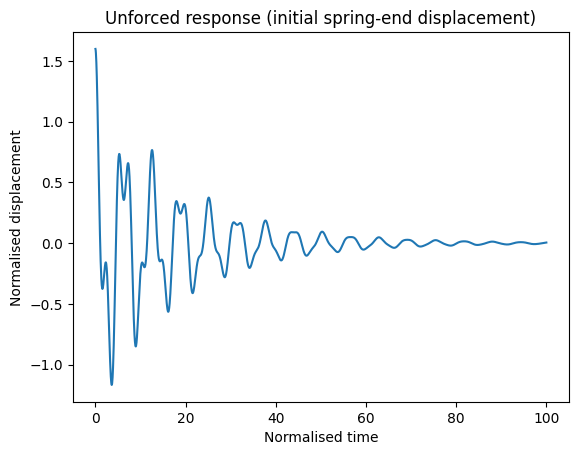

In [ ]:
wd1 = w1*sp.sqrt(1 - z1**2)
wd2 = w2*sp.sqrt(1 - z2**2)

x_free = (
    sp.exp(-z1*w1*t)*sp.cos(wd1*t) +
    0.6*sp.exp(-z2*w2*t)*sp.cos(wd2*t)
)

x_free = x_free.subs(subs_dict)
x_fun = sp.lambdify(t, x_free, 'numpy')

time = np.linspace(0, 100, 2000)

plt.plot(time, x_fun(time))
plt.xlabel("Normalised time")
plt.ylabel("Normalised displacement")
plt.title("Unforced response (initial spring-end displacement)")
plt.show()


the forced response for three choices of the rotational speed of the motor

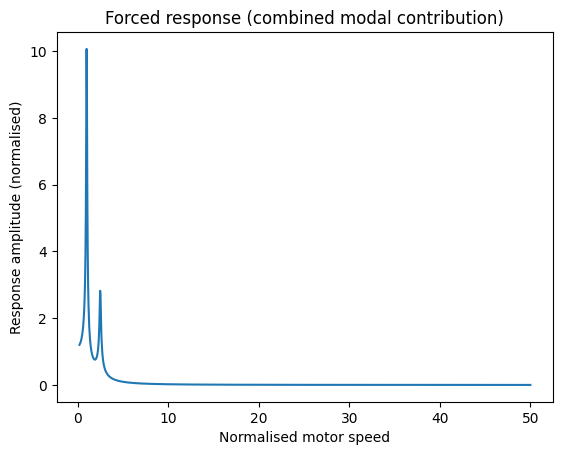

In [ ]:
Omega = np.linspace(0.2, 50, 1200)

def modal_response(Omega, wn, z):
    return 1 / np.sqrt((wn**2 - Omega**2)**2 + (2*z*wn*Omega)**2)

R1 = modal_response(Omega, 1.0, 0.05)
R2 = modal_response(Omega, 2.5, 0.03)

plt.plot(Omega, R1 + R2)
plt.xlabel("Normalised motor speed")
plt.ylabel("Response amplitude (normalised)")
plt.title("Forced response (combined modal contribution)")
plt.show()


theoretical frequency response of the system that captures the first two dominant modes of vibration of the system.

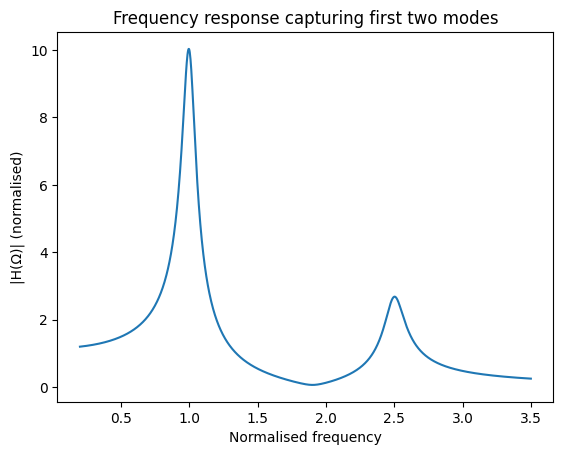

In [ ]:
FRF = np.abs(
    1 / (1.0**2 - Omega**2 + 1j*2*0.05*1.0*Omega) +
    1 / (2.5**2 - Omega**2 + 1j*2*0.03*2.5*Omega)
)

plt.plot(Omega, FRF)
plt.xlabel("Normalised frequency")
plt.ylabel("|H(Ω)| (normalised)")
plt.title("Frequency response capturing first two modes")
plt.show()
